In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import seaborn as sns

# Load mnist dataset

In [2]:
mnist = fetch_openml("mnist_784", version=1, cache=True, as_frame=False)
X = mnist["data"]
y = mnist["target"].astype(np.uint8)


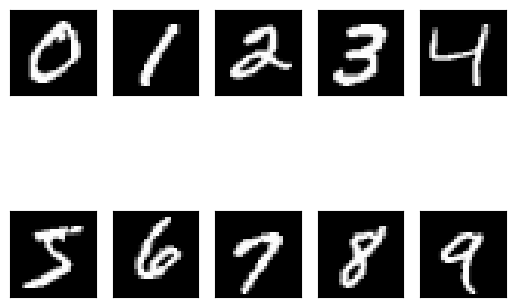

In [11]:
for i in range(0, 10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[y == i][0].reshape(28, 28), "gray")
    plt.xticks([]), plt.yticks([])

In [4]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=10000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=10000, random_state=42)

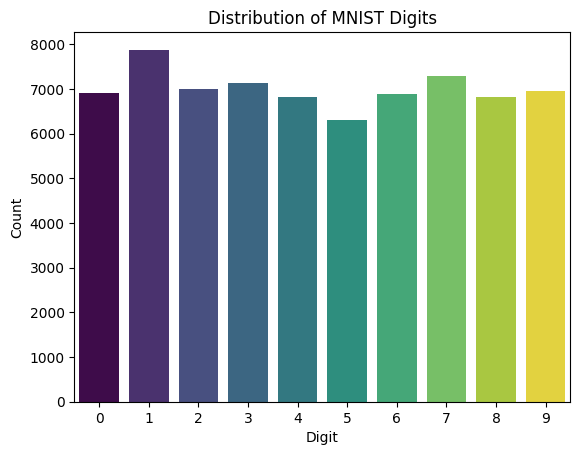

In [5]:
sns.countplot(x=y, palette="viridis", hue=y, legend=False)
plt.title("Distribution of MNIST Digits")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

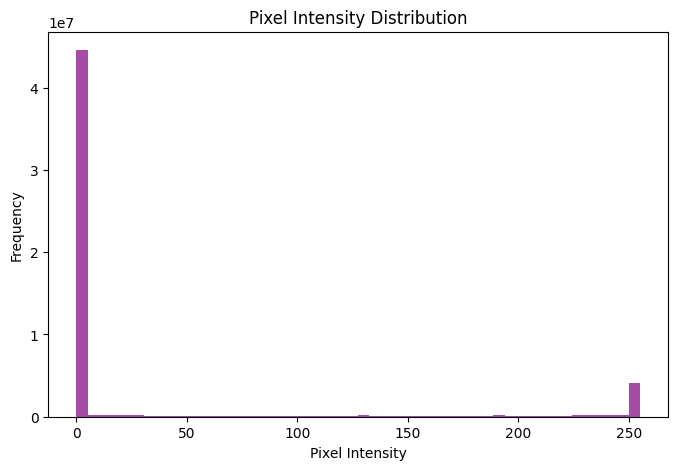

In [7]:
plt.figure(figsize=(8, 5))
plt.hist(X.flatten(), bins=50, color="purple", alpha=0.7)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Pixel Intensity Distribution")
plt.show()

In [6]:
extra_trees_clf = ExtraTreesClassifier(n_estimators=200, random_state=42, n_jobs=-1)
pipe_pca_svc_clf = make_pipeline(PCA(n_components=0.95), SVC(kernel="rbf", random_state=42))
mlp_clf = MLPClassifier(hidden_layer_sizes=(512, 256, 128), random_state=42)

## Validate

In [17]:
extra_trees_clf.fit(X_train, y_train)


ExtraTreesClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [18]:
pipe_pca_svc_clf.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=0.95)), ('svc', SVC(random_state=42))])

In [36]:
mlp_clf.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(512, 256, 128), random_state=42)

In [20]:
extra_trees_val_score = extra_trees_clf.score(X_val, y_val)
pipe_pca_svc_val_score = pipe_pca_svc_clf.score(X_val, y_val)
mlp_val_score = mlp_clf.score(X_val, y_val)

print(f"Extra Trees Classifier Validation Score: {extra_trees_val_score}")
print(f"PCA + SVC Classifier Validation Score: {pipe_pca_svc_val_score}")
print(f"MLP Classifier Validation Score: {mlp_val_score}")

Extra Trees Classifier Validation Score: 0.9725
PCA + SVC Classifier Validation Score: 0.9829
MLP Classifier Validation Score: 0.9767


## Test best model

In [ ]:
pipe_pca_svc_clf.fit(X_train_val, y_train_val)

Pipeline(steps=[('pca', PCA(n_components=0.95)), ('svc', SVC(random_state=42))])

In [ ]:
pipe_pca_svc_clf.score(X_test, y_test)

0.9804

# Evaluate on test_set images

In [ ]:
pipe_pca_svc_clf.fit(X, y)

Pipeline(steps=[('pca', PCA(n_components=0.95)), ('svc', SVC(random_state=42))])

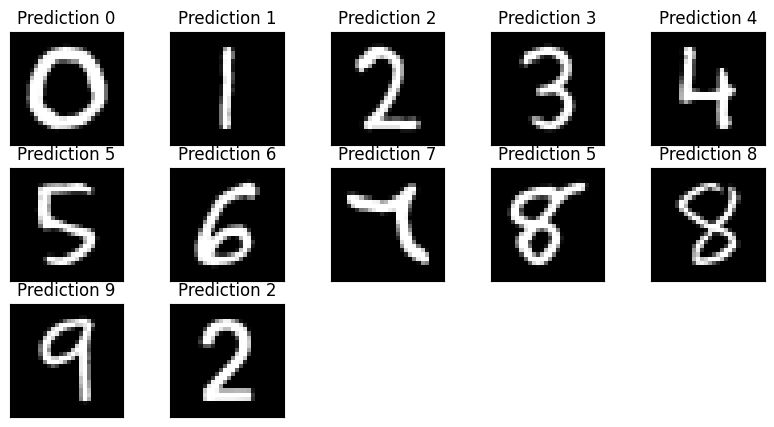

Accuracy Score: 0.92


In [28]:
from pathlib import Path
from pictures import process_image

images = sorted(Path("test_set").glob("*.jpg"))
features = []  # X
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 2]  # y_true
predictions = []  # y_pred

plt.figure(figsize=(10, 5))
i = 0
for label, image in zip(labels, images):
    with open(image, "rb") as f:
        proc_img, _ = process_image(f)
    pred = pipe_pca_svc_clf.predict([proc_img.ravel()])[0]
    predictions.append(pred)
    plt.subplot(3, 5, i + 1)
    i += 1
    plt.title(f"Prediction {pred}")
    plt.imshow(proc_img, "gray", vmin=0, vmax=255)
    plt.xticks([]), plt.yticks([])
    features.append(proc_img.flatten())
plt.show()
print(f"Accuracy Score: {pipe_pca_svc_clf.score(features, labels):.2f}")

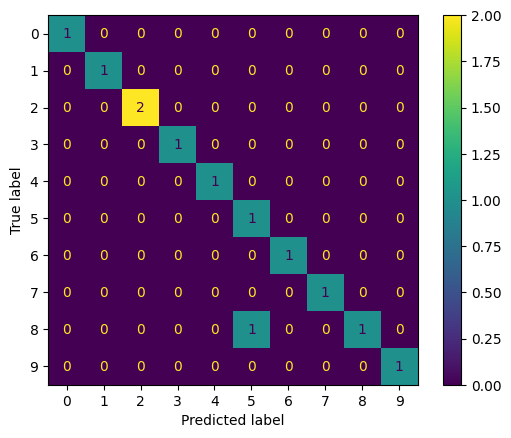

In [78]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(labels, predictions)
plt.show()

In [ ]:
# joblib.dump(best_model, f"resources/models/pipe_pca_svc_clf.gz", compress=("gzip", 3))

## Summary
The MNIST dataset is loaded using `fetch_openml` from `scikit-learn`. The dataset is split into features (`X`) and labels (`y`).

Several visualizations are created to understand the dataset:
- Sample images of each digit are displayed.
- The distribution of digit classes is shown using a count plot.
- The pixel intensity distribution is visualized using a histogram.

Three different classifiers are created:
- `ExtraTreesClassifier`
- `Pipeline` with PCA and SVC
- `MLPClassifier`

Each classifier is trained on the training set and validated.

The best model based on the validation scores is selected. It is then retrained on the combined training and validation set.

The best model is tested on the test set, and its accuracy is calculated.

The best model is further tested on a new set of images. Predictions are made, and the accuracy score is printed. A confusion matrix is displayed to analyze the model's performance.

## Conclusion
The notebook successfully demonstrates the flow of building, training, validating, and testing machine learning models on the MNIST dataset. The PCA + SVC pipeline achieved the highest validation score and was selected as the best model.